<a href="https://colab.research.google.com/github/AsavriKaur/Sentiment-Analysis-Using-Tweets/blob/main/Copy_of_Project_21_Emotion_Classification_using_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Classification using Tweets

## Introduction

In today’s digital age, people frequently express their emotions, opinions, and experiences on social media platforms. Twitter, with its vast and real-time stream of user-generated content, provides a unique dataset for analyzing emotions expressed in short, informal text. Accurately classifying emotions from tweets can provide valuable insights across various fields, including psychology, marketing, and social media analytics. By understanding the emotional landscape of tweets, organizations and researchers can better gauge public sentiment, improve customer engagement, and even respond to mental health issues.

## Motivation and Problem Statement

**Motivation**  
Emotions play a crucial role in human communication, as they shape interactions and decisions. However, emotions are conveyed through nuanced language, often influenced by personal experiences, cultural backgrounds, and social contexts. Capturing these nuances in text is challenging, especially in the informal, often abbreviated language of social media. Traditional approaches may overlook these subtleties, making it essential to develop robust models capable of identifying complex emotional expressions.

**Problem Statement**  
Emotions are expressed in varied and nuanced ways, which depend on individual and collective experiences, knowledge, and beliefs. Understanding emotions as conveyed in text, therefore, requires a sophisticated mechanism capable of capturing and modeling these linguistic subtleties. This project seeks to develop deep learning-based solutions that can accurately classify emotions in textual data, focusing specifically on tweets, to improve the ability of systems to recognize and interpret diverse emotional expressions.

---



# Data Sources

The dataset used for this project is the [**Emotion Dataset**](https://huggingface.co/datasets/dair-ai/emotion) from the Hugging Face `dair-ai/emotion` repository, which contains tweets labeled with emotions. This dataset provides a suitable variety of emotional expressions found on Twitter, capturing informal language and short-text characteristics typical of social media.

In [ ]:
!pip install datasets
from datasets import load_dataset

# Load dataset
ds_split = load_dataset("dair-ai/emotion", "split")
ds_unsplit = load_dataset("dair-ai/emotion", "unsplit")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/26.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/416809 [00:00<?, ? examples/s]

# Exploratory Analysis of Data

## Properties of the Data
The dataset has 2 configurations:
*   split: with a total of 20,000 examples split into train, validation
*   unsplit: with a total of 416,809 examples in a single train split

In [ ]:
import pandas as pd

data_split = ds_split['train'].to_pandas()
data_unsplit = ds_unsplit['train'].to_pandas()
label_counts0 = data_split['label'].value_counts()
label_counts1 = data_unsplit['label'].value_counts()

# Print the shape of the DataFrame
print("Split Data shape:", data_split.shape)
print("\nSplit Data head:")
print(data_split.head())
print("\nLabel distribution for split set:")
print(label_counts0)
print('---------------------------------------------')
print("\nUnsplit Data shape:", data_unsplit.shape)
print("\nUnsplit Data head:")
print(data_unsplit.head())
print("\nLabel distribution for unsplit set:")
print(label_counts1)

Split Data shape: (16000, 2)

Split Data head:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

Label distribution for split set:
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64
---------------------------------------------

Unsplit Data shape: (416809, 2)

Unsplit Data head:
                                                text  label
0  i feel awful about it too because it s my job ...      0
1                              im alone i feel awful      0
2  ive probably mentioned this before but i reall...      1
3           i was feeling a little low few days back      0
4  i beleive that i am much more sensitive to oth...      2

Label 

## Number of Classes
The dataset has six emotion labels:
- **Sadness (0)**
- **Joy (1)**
- **Love (2)**
- **Anger (3)**
- **Fear (4)**
- **Surprise (5)**

In [ ]:
# Display the unique labels
num_labels = data_unsplit['label'].nunique()

print("Number of unique labels:", num_labels)

Number of unique labels: 6


## Data Pre-processing

**Data Splitting**: Since the 'split' configuration has less training data and an uneven distribution of tweets across labels, we chose to use the 'unsplit' configuration and split it into training, validation, and test sets ourselves. This approach allows us to ensure that each set is balanced by label, providing equal representation of each emotion class.

In [ ]:
data = data_unsplit
df_list = []
db = data.copy()

for num in [3000,1000,6000]:
  # Split the data based on label values
  sadness_data = db[db['label'] == 0].iloc[:num]
  joy_data = db[db['label'] == 1].iloc[:num]
  love_data = db[db['label'] == 2].iloc[:num]
  anger_data = db[db['label'] == 3].iloc[:num]
  fear_data = db[db['label'] == 4].iloc[:num]
  surprise_data = db[db['label'] == 5].iloc[:num]

  # Combine the data into a single DataFrame
  df = pd.concat([sadness_data, joy_data, love_data, anger_data, fear_data, surprise_data])

  # Remove the sampled data from the copyed dataset
  db = db.drop(df.index)

  df_list.append(df)

df_test = df_list[0].sample(frac=1, random_state=42).reset_index(drop=True)
df_validation = df_list[1].sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_list[2].sample(frac=1, random_state=42).reset_index(drop=True)

# Print shapes
print("Train data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("Validation data shape:", df_validation.shape)

# Print label counts for df_test, df_validation, and df_train
print("\nLabel counts in df_test:")
print(df_test['label'].value_counts())

print("\nLabel counts in df_validation:")
print(df_validation['label'].value_counts())

print("\nLabel counts in df_train:")
print(df_train['label'].value_counts())

Train data shape: (36000, 2)
Test data shape: (18000, 2)
Validation data shape: (6000, 2)

Label counts in df_test:
label
0    3000
2    3000
3    3000
1    3000
5    3000
4    3000
Name: count, dtype: int64

Label counts in df_validation:
label
1    1000
3    1000
0    1000
2    1000
5    1000
4    1000
Name: count, dtype: int64

Label counts in df_train:
label
2    6000
3    6000
4    6000
1    6000
0    6000
5    6000
Name: count, dtype: int64


## Challenging Aspects of the Data

- **Short Length of Tweets:** Shorter text lengths provide less contextual information, may making emotion classification difficult.
- **Ambiguity in Emotions:** Some long tweets may express multiple emotions simultaneously, creating challenges in assigning a single label.

# Models and Methods

For this emotion classification task, three baseline models were chosen: **Recurrent Neural Networks (RNN)**, **Long Short-Term Memory (LSTM)**, and **DistilBERT**. These models were selected based on their ability to handle sequential data and learn contextual relationships within text, which is crucial for understanding emotions conveyed in tweets.

### Original Work: Graph-Based Processing
   The models were trained both on the raw data and on data that has undergone additional processing via a [graph-based approach](https://github.com/LyzJames/graph.git) we created. This processing step includes:
   - Building co-occurrence graphs to capture word relationships.
   - Merging consecutive words based on their edge weight in the graph to capture multi-word expressions.
   - Removing stopwords to clean the data.

These preprocessing steps aim to enhance the models' understanding of linguistic nuances and improve emotion classification performance.

In [ ]:
!git clone https://github.com/LyzJames/graph.git
%cd graph
import graph

df_train_graph, df_validation_graph, df_test_graph = graph.Graph_Based_Processing(df_train.copy(), df_validation.copy(), df_test.copy())

# Print the first rows for each dataset to check
print("\nTrain data head:")
print(df_train.head())
print("\nGraph Train data head:")
print(df_train_graph.head())

def preprocess_text(text):
  return text.replace("(", "").replace(")", "")

df_train_graph['text'] = df_train_graph['text'].apply(preprocess_text)
df_test_graph['text'] = df_test_graph['text'].apply(preprocess_text)
df_validation_graph['text'] = df_validation_graph['text'].apply(preprocess_text)

Cloning into 'graph'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 61 (delta 18), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 22.88 KiB | 5.72 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/graph


Processing texts: 100%|██████████| 60000/60000 [00:04<00:00, 14770.40text/s]
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Train data head:
                                                text  label
0   i also feel strangely affectionate towards frank      2
1  i feel more impatient about giving birth this ...      3
2  ive always loved very but i kind of feel like ...      3
3                       i feel completely indecisive      4
4  i feel very virtuous from having exercised tha...      1

Graph Train data head:
                                                text  label
0  (also) (feel) (strangely) (affectionate) (towa...      2
1        (ifeel) (impatient) (giving) (birth) (time)      3
2  (ive) (always) (loved) (kind) (feellike) (they...      3
3                  (ifeel) (completely) (indecisive)      4
4              (ifeel) (virtuous) (exercised) (much)      1


## **RNN Model**

The [Recurrent Neural Network (RNN)](https://colab.research.google.com/drive/1mVwQQKDViEU1YPMrEojXVarvRRayWeHy?usp=sharing) model is well-suited for processing sequential data, and were used here to model the relationships between words in the text sequences. The RNN captures the temporal dependencies in the data, making it useful for predicting emotion based on the sequence of words in a tweet.

In [ ]:
import tensorflow as tf
from google.colab import drive

drive.mount('/content/drive')

model_path = '/content/drive/MyDrive/RNN_model.keras'
RNN_model = tf.keras.models.load_model(model_path)
RNN_model.summary()

Mounted at /content/drive


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, None)                │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, None, 32)            │          64,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,460 (849.46 KB)

 Trainable params: 72,486 (283.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 144,974 (566.31 KB)

## **RNN Model use Graph data**
[RNN_With_Graph_Data_model](https://colab.research.google.com/drive/12kAWs3tyQcTYKs_KEtK9lJ87uiPkyzpL?usp=sharing)

In [ ]:
model_path = '/content/drive/MyDrive/RNN_With_Graph_Data_model.keras'
RNN_With_Graph_Data_model = tf.keras.models.load_model(model_path)

## **LSTM Model**

The [Long Short-Term Memory (LSTM)](https://colab.research.google.com/drive/10ob5NAFNYmexAGMl18d0VqRO7QnMpazg?usp=sharing) network is a type of RNN that addresses the issue of vanishing gradients, which allows them to capture longer-term dependencies in sequential data. Given that emotions in text may be influenced by broader context within the tweet, LSTM networks were chosen to potentially provide a better performance on longer texts compared to standard RNNs.

In [ ]:
model_path = '/content/drive/MyDrive/LSTM_model.keras'
LSTM_model = tf.keras.models.load_model(model_path)
LSTM_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, None)                │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, None, 32)            │          64,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273,332 (1.04 MB)

 Trainable params: 91,110 (355.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 182,222 (711.81 KB)

## **LSTM Model use Graph data**
[LSTM_With_Graph_Data_model](https://colab.research.google.com/drive/1k_5RqU2jiUvWrAoND65rk-6lHGdSFXf9?usp=sharing)

In [ ]:
model_path = '/content/drive/MyDrive/LSTM_With_Graph_Data_model.keras'
LSTM_With_Graph_Data_model = tf.keras.models.load_model(model_path)

## **DistilBERT Model**

[DistilBERT](https://colab.research.google.com/drive/1UJo7brvhaxR_Ppf-eXZQBhKltQpJYHlp?usp=sharing) is a smaller, faster version of BERT, a transformer-based model that has been pre-trained on a large corpus of text. This model was chosen for its ability to understand the contextual relationships within a text and its efficiency in handling large-scale datasets. DistilBERT is particularly effective in fine-tuning for specific NLP tasks, such as emotion classification.

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model_path = '/content/drive/MyDrive/DistilBERT_model'
DistilBERT_model = TFAutoModelForSequenceClassification.from_pretrained(model_path)
DistilBERT_model.summary()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/DistilBERT_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  4614      
                                                                 
 dropout_19 (Dropout)        multiple                  0 (unused)
                                                                 
Total params: 66958086 (255.42 MB)
Trainable params: 66958086 (255.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **DistilBERT Model use Graph data**
[DistilBERT_With_Graph_Data_model](https://colab.research.google.com/drive/1z_ks6kjc8Qyb0rxx4-g4zkhTw32Th1nu?usp=sharing)

In [ ]:
model_path = '/content/drive/MyDrive/DistilBERT_With_Graph_Data_model'
DistilBERT_With_Graph_Data_model = TFAutoModelForSequenceClassification.from_pretrained(model_path)

Some layers from the model checkpoint at /content/drive/MyDrive/DistilBERT_With_Graph_Data_model were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/DistilBERT_With_Graph_Data_model and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inferen

# Results

## Model Preparation and Data Preprocessing

In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset
from transformers import DataCollatorWithPadding, create_optimizer

test_list = []

def preprocess_function(db):
    return tokenizer(db['text'], truncation=True)
# Initialize the DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
# Create a data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

for test in [df_test, df_test_graph]:
    test_ds = tf.data.Dataset.from_tensor_slices((test["text"].values, test["label"].values))
    test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)
    test_list.append(test_ds)

    test_data = Dataset.from_pandas(test, preserve_index=False)
    true_labels = test_data['label']
    tokenized_test = test_data.map(preprocess_function, batched=True)
    test_list.append(tokenized_test)

    if test is df_test:
      model = DistilBERT_model
    else:
      model = DistilBERT_With_Graph_Data_model

    tf_test_set = model.prepare_tf_dataset(
        tokenized_test,
        shuffle=False,
        batch_size=32,
        collate_fn=data_collator,
    )
    test_list.append(tf_test_set)

batch_size = 32
num_epochs = 5
batches_per_epoch = len(test_list[1]) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
batches_per_epoch1 = len(test_list[4]) // batch_size
total_train_steps1 = int(batches_per_epoch1 * num_epochs)

optimizer, schedule = create_optimizer(init_lr=0.00017, num_warmup_steps=0, num_train_steps=total_train_steps)
optimizer1, schedule = create_optimizer(init_lr=0.00017, num_warmup_steps=0, num_train_steps=total_train_steps1)

DistilBERT_model.compile(optimizer=optimizer, metrics=['accuracy'])
DistilBERT_With_Graph_Data_model.compile(optimizer=optimizer1, metrics=['accuracy'])

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/18000 [00:00<?, ? examples/s]

Map:   0%|          | 0/18000 [00:00<?, ? examples/s]

## Model Evaluation and Results

To evaluate each model’s performance on emotion classification, we used several metrics: loss, accuracy, F1 score, precision, and recall. The code iterates through four models—`Dense_model`, `RNN_model`, `LSTM_model`, and `DistilBERT_model`—and applies evaluation and prediction functions to each, followed by the calculation of classification metrics.

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Evaluate each model and store the results
models = [RNN_model, RNN_With_Graph_Data_model, LSTM_model, LSTM_With_Graph_Data_model, DistilBERT_model, DistilBERT_With_Graph_Data_model]
model_name = ['RNN_model', 'RNN_With_Graph_Data_model', 'LSTM_model', 'LSTM_With_Graph_Data_model', 'DistilBERT_model', 'DistilBERT_With_Graph_Data_model']
target_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
labels = [0,1,2,3,4,5]
true_labels = df_test["label"].values
results = {}
wrong_case = {}

# Loop through the models to evaluate
for model in models:
    if model in [RNN_model, LSTM_model]:
        test = test_list[0]
    elif model in [RNN_With_Graph_Data_model, LSTM_With_Graph_Data_model]:
        test = test_list[3]
    elif model == DistilBERT_model:
        test = test_list[2]
    elif model == DistilBERT_With_Graph_Data_model:
        test = test_list[5]

    loss, acc = model.evaluate(test)

    # Get predictions from the model
    predictions = model.predict(test)

    if model in [DistilBERT_model, DistilBERT_With_Graph_Data_model]:
        logits = predictions.logits
        predicted_labels = tf.argmax(logits, axis=-1).numpy()
    else:
        predicted_labels = tf.argmax(predictions, axis=-1).numpy()

    wrong_indices = np.where(predicted_labels != true_labels)[0]
    wrong_case[model_name[models.index(model)]] = [
        {
            "index": idx,
            "predicted_label": predicted_labels[idx]
        }
        for idx in wrong_indices
    ]

    # Calculate classification metrics
    report = classification_report(true_labels, predicted_labels, target_names=target_names, labels=labels, output_dict=True)

    # Store results
    results[model_name[models.index(model)]] = {
        'accuracy': acc,
        'f1_score': report['weighted avg']['f1-score'],
        'precision': np.mean([report[label]['precision'] for label in target_names]),
        'recall': np.mean([report[label]['recall'] for label in target_names])
    }

# Print the results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print()


563/563 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8313 - loss: 0.6324
563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8893 - loss: 0.3400
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9336 - loss: 0.1942
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9302 - loss: 0.2055
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
563/563 [==============================] - 21s 35ms/step

RNN_model Results:
Accuracy: 0.8274999856948853
F1 Score: 0.8236059663092749
Precision: 0.8348086746241813
Recall: 0.8275


RNN_With_Graph_Data_model Results:
Accuracy: 0.886888861656189
F1 Score: 0.8861842117946636
Precision: 0.8875939923274129
Recall: 0.886888888888889


LSTM_model Results:
Accuracy: 0.9327222108840942
F1 Score: 0.9321336588857646
Precision: 0.9341201915369158
Recall: 0.9327222222222223


LSTM_With_Graph_Data_model Results:
Accuracy: 0.927722215652465

## Model Performance Visualization

To effectively compare the performance of each model on F1 score, we created a series of bar plots that visually represent these metrics.

<ipython-input-14-5ff1552592c2>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(model_vs_modelWithGraphData1, rotation=45)
<ipython-input-14-5ff1552592c2>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(model_vs_modelWithGraphData2, rotation=45)
<ipython-input-14-5ff1552592c2>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(model_vs_modelWithGraphData3, rotation=45)


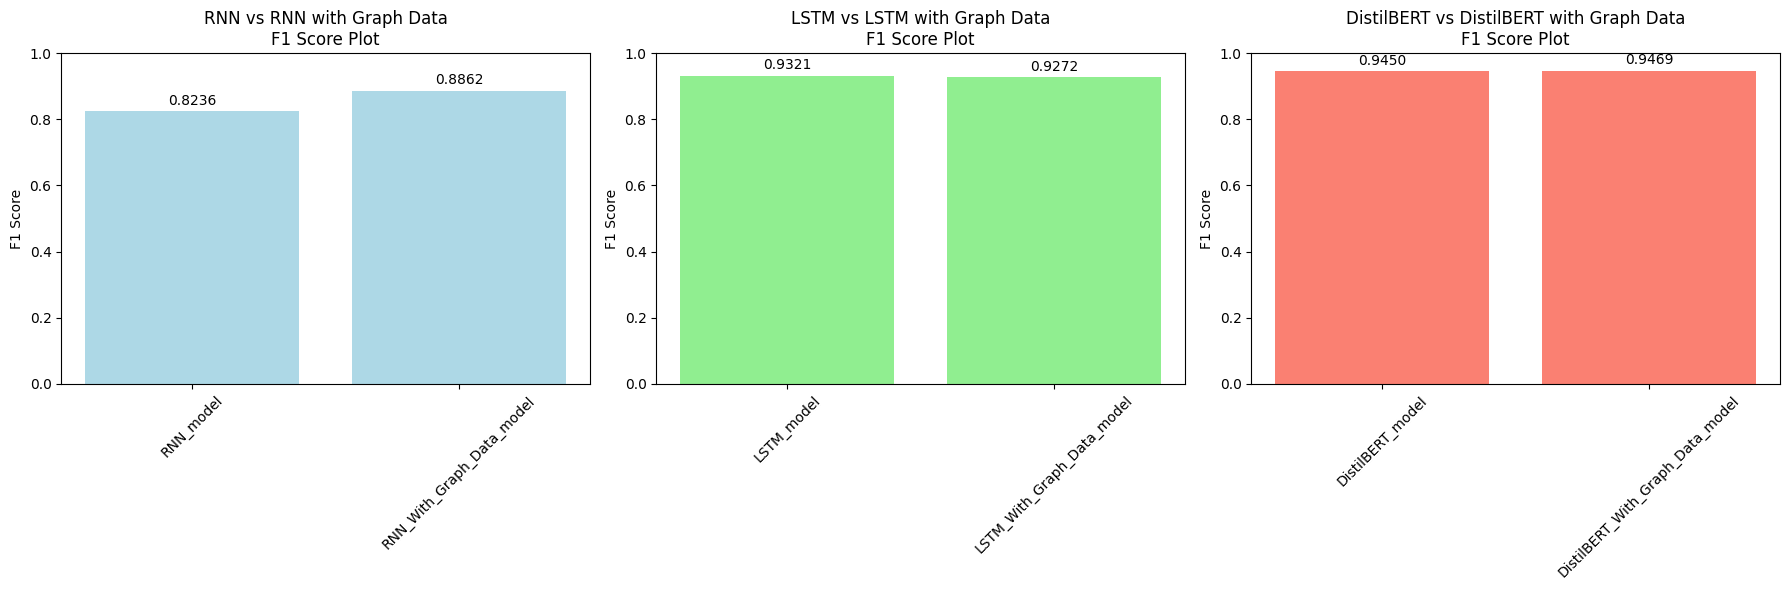

In [ ]:
import matplotlib.pyplot as plt

model_vs_modelWithGraphData1 = ['RNN_model', 'RNN_With_Graph_Data_model']
model_vs_modelWithGraphData2 = ['LSTM_model', 'LSTM_With_Graph_Data_model']
model_vs_modelWithGraphData3 = ['DistilBERT_model', 'DistilBERT_With_Graph_Data_model']
f1_scores1 = [results[model]['f1_score'] for model in model_vs_modelWithGraphData1]
f1_scores2 = [results[model]['f1_score'] for model in model_vs_modelWithGraphData2]
f1_scores3 = [results[model]['f1_score'] for model in model_vs_modelWithGraphData3]

# Create the plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy Plot
axs[0].bar(model_vs_modelWithGraphData1, f1_scores1, color='lightblue', label='RNN vs RNN with Graph Data')
axs[0].set_title('RNN vs RNN with Graph Data\nF1 Score Plot')
axs[0].set_ylabel('F1 Score')
axs[0].set_ylim(0, 1)
axs[0].set_xticklabels(model_vs_modelWithGraphData1, rotation=45)
for i, f1 in enumerate(f1_scores1):
    axs[0].text(i, f1 + 0.02, f'{f1:.4f}', ha='center')

# Loss Plot
axs[1].bar(model_vs_modelWithGraphData2, f1_scores2, color='lightgreen', label='LSTM vs LSTM with Graph Data')
axs[1].set_title('LSTM vs LSTM with Graph Data\nF1 Score Plot')
axs[1].set_ylabel('F1 Score')
axs[1].set_ylim(0, 1)
axs[1].set_xticklabels(model_vs_modelWithGraphData2, rotation=45)
for i, f1 in enumerate(f1_scores2):
    axs[1].text(i, f1 + 0.02, f'{f1:.4f}', ha='center')

# F1 Score Plot
axs[2].bar(model_vs_modelWithGraphData3, f1_scores3, color='salmon', label='DistilBERT vs DistilBERT with Graph Data')
axs[2].set_title('DistilBERT vs DistilBERT with Graph Data\nF1 Score Plot')
axs[2].set_ylabel('F1 Score')
axs[2].set_ylim(0, 1)
axs[2].set_xticklabels(model_vs_modelWithGraphData3, rotation=45)
for i, f1 in enumerate(f1_scores3):
    axs[2].text(i, f1 + 0.02, f'{f1:.4f}', ha='center')

# Show the plots
plt.tight_layout()
plt.show()

## Example Output

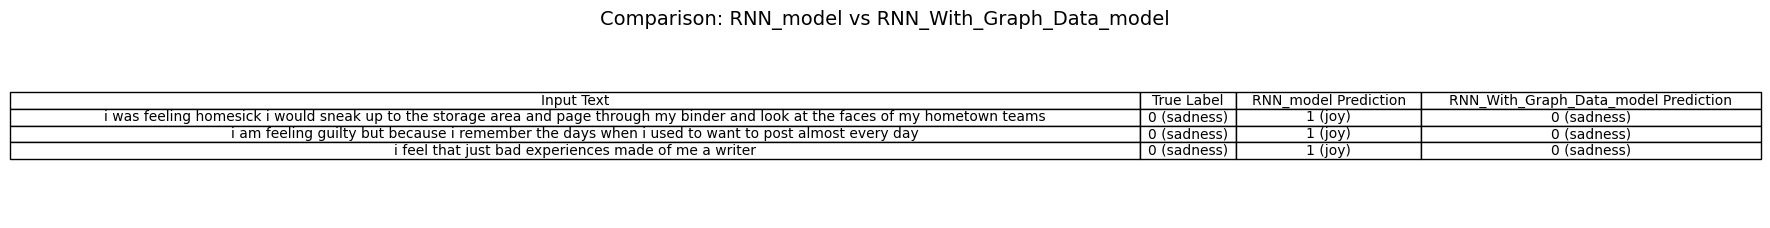

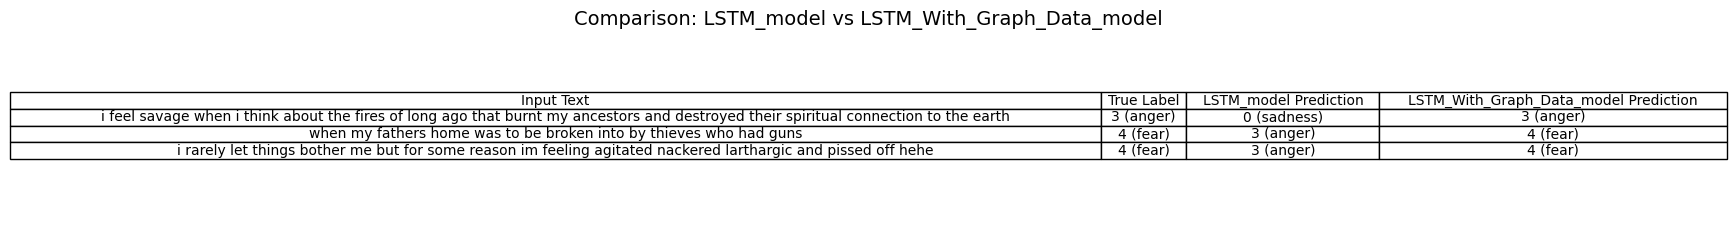

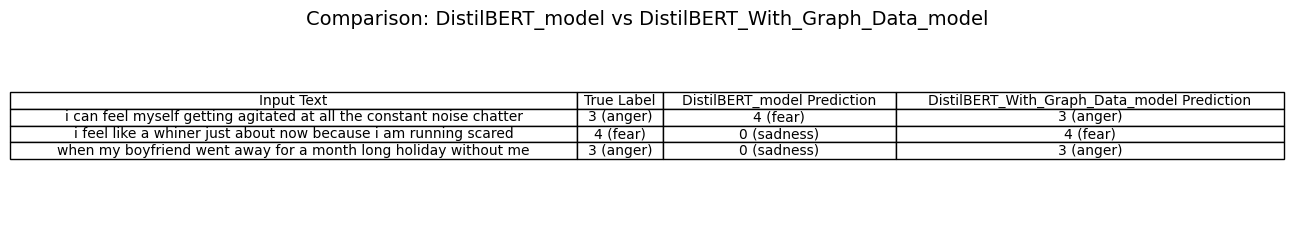

In [ ]:
# Pair of models to compare
model_pairs = [
    ("RNN_model", "RNN_With_Graph_Data_model"),
    ("LSTM_model", "LSTM_With_Graph_Data_model"),
    ("DistilBERT_model", "DistilBERT_With_Graph_Data_model")
]

# Function to find examples where graph data improves performance
for normal_model, graph_model in model_pairs:

    # Initialize a list to hold comparison data for this pair
    comparison_data = []

    # Find indices where graph-enhanced model is correct but normal model is wrong
    normal_wrong = {case["index"] for case in wrong_case[normal_model]}
    graph_correct = {case["index"] for case in wrong_case[graph_model]}
    improved_cases = normal_wrong - graph_correct

    count = 0
    for idx in improved_cases:
        if count >= 3:
            break

        # Retrieve the example data
        example = [case for case in wrong_case[normal_model] if case["index"] == idx][0]
        input_text = df_test["text"][idx]
        true_label = df_test["label"][idx]
        normal_prediction = example["predicted_label"]

        # Append to the comparison data list
        comparison_data.append({
            "Input Text": input_text,
            "True Label": f"{true_label} ({target_names[true_label]})",
            normal_model + " Prediction": f"{normal_prediction} ({target_names[normal_prediction]})",
            graph_model + " Prediction": f"{true_label} ({target_names[true_label]})"
        })
        count += 1

    # Convert comparison data to DataFrame
    comparison_df = pd.DataFrame(comparison_data)

    # Plot the table for this pair
    fig, ax = plt.subplots(figsize=(12, len(comparison_df) * 0.8))
    ax.axis('off')
    table = ax.table(
        cellText=comparison_df.values,
        colLabels=comparison_df.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(comparison_df.columns))))

    plt.title(f"Comparison: {normal_model} vs {graph_model}", fontsize=14)
    plt.show()

# Discussion
The improvement in RNN performance with graph-based preprocessing is likely due to the model’s ability to better capture word dependencies in sequential data, enhancing emotion recognition. RNNs, by design, excel in sequence learning, and the graph structure highlights important word relationships, improving classification accuracy. However, LSTM and DistilBERT did not show significant improvements, possibly because LSTMs already capture long-range dependencies and DistilBERT’s pre-trained knowledge may render the graph-based structure redundant.

## Strengths and Weaknesses
One of the key strengths of graph-based preprocessing is its ability to highlight subtle relationships between words that might otherwise be overlooked, especially in highly contextual tasks like emotion classification. For RNN models, which are adept at identifying sequences and dependencies in data, this enhancement can lead to significant performance improvements. The graph's ability to merge consecutive words based on their edge weight likely helps capture multi-word expressions and nuanced emotions, which is crucial for sentiment analysis tasks.

However, the approach is not without its weaknesses. While it improved performance for the RNN model, it did not significantly benefit LSTM or DistilBERT. The lack of improvement in LSTM could stem from the model’s capacity to capture long-range dependencies on its own, rendering the graph preprocessing redundant. Similarly, DistilBERT’s pre-trained nature may result in an oversaturation of contextual knowledge, making it less sensitive to additional graph structures, which could interfere with its already fine-tuned embeddings.

## Limitations
One limitation of this study is the small number of models tested. While RNN, LSTM, and DistilBERT are commonly used in emotion recognition tasks, there are other models, like Transformers or even more complex hybrid models, that could offer different insights into the effectiveness of graph-based processing. Additionally, the choice of preprocessing method could be a limiting factor, as different types of graph structures or enhancements might yield better results, especially with more complex datasets.

## Future Work
In future work, we could refine the graph-based preprocessing technique to better match the strengths of specific models, such as LSTM or Transformer-based architectures like GPT and T5, which have demonstrated strong performance in NLP tasks. Additionally, optimizing the threshold for classification decisions could improve accuracy, especially for edge cases where models struggle to distinguish between closely related emotion categories. Further improvements could also involve enhancing the graph algorithm itself, for instance, by incorporating more advanced graph structures or additional linguistic features that capture more nuanced relationships between words and phrases. Combining these graph-based techniques with attention mechanisms or reinforcement learning could yield promising results in emotion classification tasks.

# References

1. Saravia, E., Liu, H.-C. T., Huang, Y.-H., Wu, J., & Chen, Y.-S. (2018). *{CARER}: Contextualized Affect Representations for Emotion Recognition*. In *Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing* (pp. 3687–3697). Association for Computational Linguistics. https://www.aclweb.org/anthology/D18-1404. https://doi.org/10.18653/v1/D18-1404.

2. Sanh, V., Debut, L., Chaumond, J., & Wolf, T. (2019). *DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter*. arXiv. https://arxiv.org/abs/1910.01108.

3. Abdul-Mageed, M., & Ungar, L. (2017). EmoNet: Fine-Grained Emotion Detection with Gated Recurrent Neural Networks. In *Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics* (Volume 1: Long Papers), 718–728. Vancouver, Canada. Association for Computational Linguistics. https://aclanthology.org/P17-1067/.

4. Bianchi, F., Nozza, D., & Hovy, D. (2021). FEEL-IT: Emotion and Sentiment Classification for the Italian Language. In *Proceedings of the Eleventh Workshop on Computational Approaches to Subjectivity, Sentiment and Social Media Analysis*, 76–83. Online. Association for Computational Linguistics. https://aclanthology.org/2021.wassa-1.8/.



